In [1]:
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import image
import os
import cv2
import json
! pip install --quiet vietocr==0.3.2
from vietocr.tool.predictor import Predictor
from vietocr.model.trainer import Trainer
from vietocr.tool.config import Cfg
from glob import glob
import re
import numpy as np

     |████████████████████████████████| 61kB 4.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 952kB 9.1MB/s 
     |████████████████████████████████| 880kB 25.7MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.4.0 which is incompatible.


In [7]:
cd /content/drive/MyDrive/Colab/vietocr_seq2seq/transformer

/content/drive/MyDrive/Colab/vietocr_seq2seq/transformer


# **CREATE FOLDER OF LINE IMAGES AND TEXT FILE OF LABELS.**

In [ ]:
# Data already created
# # Create data (pictures of lines) from image and json file

# image_list = glob('/content/drive/MyDrive/Colab/vietocr_seq2seq/run2/images_and_json/data_labeled_ggocr/*.jpg')
# label_file = open('images_all_labels.txt','w+')
# image_counts = 0

# # Make sure pwd = lines/

# for image_path in image_list[:300]:
#     image_counts += 1
#     json_path = image_path.replace('.jpg', '_lines.json')
#     img = cv2.imread(image_path)
#     f = open(json_path,'r')
#     data = json.load(f)

#     for i in range(len(data)):

#         # Giả sử tọa độ của bounding box được cho bởi 4 góc
#         # [x1,y1,x2,y2,x3,y3,x4,y4] theo chiều kim đồng hồ
#         x_low = data[i]['boundingBox'][0]
#         y_low = data[i]['boundingBox'][1]
#         x_high = data[i]['boundingBox'][2]
#         y_high = data[i]['boundingBox'][7]

#         label = data[i]['text']

#         # Quy tắc tọa độ của numpy và image là transpose của nhau
#         # Numpy quy ước chiều đầu tiên là chiều dọc
#         # Image quy ước chiều đầu tiên là chiều ngang.
#         try:
#             sub_img = img[y_low:y_high, x_low:x_high]
#             fname = 'image' + str(image_counts) + '_line' + str(i) + '.png'
#             label_file.write(f'{fname}\t{label}\n')
#             cv2.imwrite(fname, sub_img)
#         except Exception as e:
#             # print(e)
#             # print(y_low,y_high, x_low,x_high)
#             # break
#             pass
# label_file.close()

# **TRAIN**

In [ ]:
# Đã xử lý
# # Xử lý string trong các file label....

# vocab = """aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ """

# f = open('images_all_labels.txt','r')
# lines = f.readlines()

# total_str = ''
# for line in lines:
#     line = line.rstrip('\n')
#     total_str = total_str + line.split('\t')[1]
# total_str = ''.join(set(total_str))
# extra_str = ''
# for char in total_str:
#     if char not in vocab:
#         extra_str += char
# extra_str

In [ ]:
# def extra_str_process(s):
#     """
#     Input: string s
    
#     The function considers each character c in s that belongs to extra_str.
#     Then it does one of the following:
#     - If c is VERY different from vocab, then c is removed.
#     - Else, c is VERY similar to a character c' in vocab, then c is replaced with c'

#     Returns: processed string that only contains characters in vocab.
#     """
#     for i in range(len(s)):
#         if s[i] in extra_str:
#             if s[i] in ['Н','н','Η']:
#                 s[i] = 'H'
#             elif s[i] in ['О','Ο']:
#                 s[i] = 'O'
#             elif s[i] in ['Т','т','Τ']:
#                 s[i] = 'T'
#             elif s[i] in ['в','В','Β']:
#                 s[i] = 'B'

In [ ]:
# Already done
# cleaned_label = open('images_all_labels_clean.txt','w+')
# for line in lines:
#     contain_extra = False
#     for char in extra_str:
#         if char in line:
#             contain_extra = True
#             break
#     if not contain_extra:
#         cleaned_label.write(line) 
# cleaned_label.close()

In [8]:
# Create seq2seq config for trainer

config = Cfg.load_config_from_name('vgg_transformer')
dataset_params = {
    'name':'hw',
    'data_root':'/content/drive/MyDrive/Colab/vietocr_seq2seq/run2/lines',
    'train_annotation':'/content/drive/MyDrive/Colab/vietocr_seq2seq/run2/images_train_labels_clean.txt',
    'valid_annotation':'/content/drive/MyDrive/Colab/vietocr_seq2seq/run2/images_valid_labels_clean.txt'
}

params = {
         'print_every':200,
          'valid_every':5*200,
          'iters':20000,
          'checkpoint':'./checkpoint/transformer_checkpoint.pth',    
          'export':'./weights/transformer.pth',
          'metrics':100
         }

config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['device'] = 'cuda:0'

In [9]:
pwd

'/content/drive/My Drive/Colab/vietocr_seq2seq/transformer'

In [10]:
# Create trainer for training

trainer_transformer = Trainer(config, pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


Cached Downloading: /tmp/tranformerorc.pth
Downloading...
From: https://drive.google.com/uc?id=13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA
To: /root/.cache/gdown/tmpme3220oh/dl
152MB [00:01, 115MB/s] 


Computing MD5: /tmp/tranformerorc.pth
MD5 matches: /tmp/tranformerorc.pth


Create train_hw: 100%|████████████████████████████████████████| 8275/8275 [1:41:34<00:00,  1.36it/s]

Remove 40 invalid images
Created dataset with 8234 samples



Create valid_hw: 100%|██████████████████████████████████████████| 2473/2473 [28:53<00:00,  1.43it/s]

Remove 9 invalid images
Created dataset with 2463 samples



valid_hw build cluster: 100%|███████████████████████████████| 2463/2463 [00:00<00:00, 135933.93it/s]


In [11]:
# Start training

trainer_transformer.train()

iter: 018400 - train loss: 0.701 - lr: 5.80e-06 - load time: 0.02 - gpu time: 62.43
iter: 018600 - train loss: 0.698 - lr: 4.45e-06 - load time: 0.34 - gpu time: 62.15
iter: 018800 - train loss: 0.697 - lr: 3.27e-06 - load time: 0.39 - gpu time: 62.38
iter: 019000 - train loss: 0.702 - lr: 2.28e-06 - load time: 0.52 - gpu time: 61.29
iter: 019000 - valid loss: 0.758 - acc full seq: 0.6797 - acc per char: 0.9637
iter: 019200 - train loss: 0.700 - lr: 1.46e-06 - load time: 0.47 - gpu time: 62.99
iter: 019400 - train loss: 0.701 - lr: 8.20e-07 - load time: 0.46 - gpu time: 61.55
iter: 019600 - train loss: 0.696 - lr: 3.65e-07 - load time: 0.28 - gpu time: 62.09
iter: 019800 - train loss: 0.705 - lr: 9.17e-08 - load time: 0.02 - gpu time: 61.72
iter: 020000 - train loss: 0.697 - lr: 1.20e-09 - load time: 0.31 - gpu time: 61.86
iter: 020000 - valid loss: 0.759 - acc full seq: 0.7578 - acc per char: 0.8994


# **INFER**

In [12]:
pwd

'/content/drive/My Drive/Colab/vietocr_seq2seq/transformer'

In [13]:
# Create predictor for inference

config['weights'] = './weights/transformer.pth' # Use same config as above, but load in trained weights.
config['cnn']['pretrained'] = False
config['device'] = 'cuda:0'
config['predictor']['beamsearch'] = False

# Config below is for untrained model
# cfg_seq2seq = Cfg.load_config_from_name('vgg_seq2seq')
# cfg_seq2seq['cnn']['pretrained']=False
# cfg_seq2seq['device'] = 'cuda:0'
# cfg_seq2seq['predictor']['beamsearch']=False

pred_transformer = Predictor(config)

In [16]:
# Prediction

test_file_text = '/content/drive/MyDrive/Colab/vietocr_seq2seq/run2/images_test_labels_clean.txt'
test_file_img = '/content/drive/MyDrive/Colab/vietocr_seq2seq/run2/lines'

f = open(test_file_text,'r')
lines = f.readlines()
num_test = 0
total_wer = 0.0
total_cer = 0.0

for line in lines:
    line = line.rstrip('\n')
    fname = line.split('\t')[0]
    content = line.split('\t')[1]
    try:
        img = Image.open(os.path.join(test_file_img,fname))
    except:
        continue
    s = pred_transformer.predict(img)
    total_wer += WER(s, content)
    total_cer += CER(s, content)
    num_test += 1

average_wer = total_wer / num_test
average_cer = total_cer / num_test

In [17]:
print('Average WER: ',average_wer)
print('Average CER: ',average_cer)

Average WER:  0.05931493627965921
Average CER:  0.027228143091032525


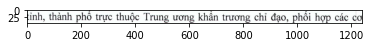

tỉnh, thành phố trực thuộc Trung ương khẩn trương chỉ đạo, phối hợp các cơ


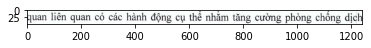

quan liên quan có các hành động cụ thể nhằm tăng cường phòng chống dịch


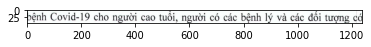

bệnh Covid-19 cho người cao tuổi, người có các bệnh lý và các đối tượng có


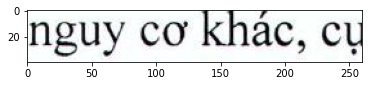

nguy cơ khác, cụ


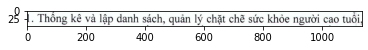

1. Thống kê và lập danh sách, quản lý chặt chẽ sức khỏe người cao tuổi,


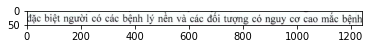

đặc biệt người có các bệnh lý nền và các đối tượng có nguy cơ cao mắc bệnh


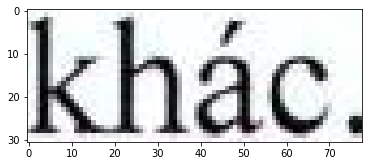

khác.


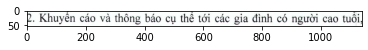

2. Khuyến cáo và thông báo cụ thể tới các gia đình có người cao tuổi,


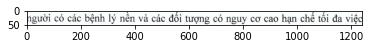

người có các bệnh lý nền và các đối tượng có nguy cơ cao hạn chế tối đa việc


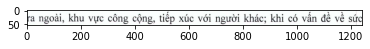

ra ngoài, khu vực công cộng, tiếp xúc với người khác; khi có vấn đề về sức


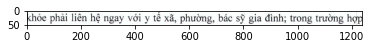

khỏe phải liên hệ ngay với y tế xã, phường, bác sỹ gia đình; trong trường hợp


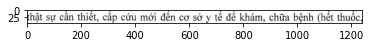

thật sự cần thiết, cấp cứu mới đến cơ sở y tế để khám, chữa bệnh (hết thuốc,


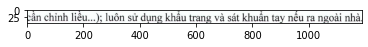

cần chỉnh liều...); luôn sử dụng khẩu trang và sát khuẩn tay nếu ra ngoài nhà.


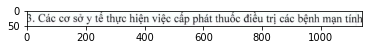

3. Các cơ sở y tế thực hiện việc cấp phát thuốc điều trị các bệnh mạn tính


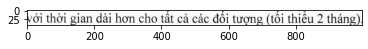

với thời gian dài hơn cho tất cả các đối tượng (tối thiểu 2 tháng).


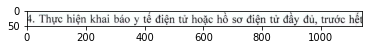

4. Thực hiện khai báo y tế điện tử hoặc hồ sơ điện tử đầy đủ, trước hết


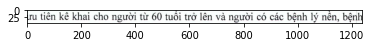

ưu tiên kê khai cho người từ 60 tuổi trở lên và người có các bệnh lý nền, bệnh


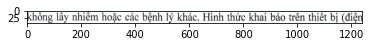

không lây nhiễm hoặc các bệnh lý khác. Hình thức khai báo trên thiết bị (điện


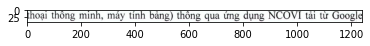

thoại thông minh, máy tính bảng) thông qua ứng dụng NCOVI tải từ Google


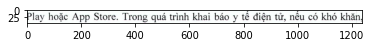

Play hoặc App Store. Trong quá trình khai báo y tế điện tử, nếu có khó khăn,


In [18]:
for line in lines[40:60]:
    line = line.rstrip('\n')
    fname = line.split('\t')[0]
    content = line.split('\t')[1]
    try:
        img = Image.open(os.path.join(test_file_img,fname))
    except:
        continue
    s = pred_transformer.predict(img)
    plt.imshow(img)
    plt.show()
    print(s)

In [19]:
num_test

1166

In [14]:
# WER and CER functions

def WER(hypo:str, ref:str):
    """
    Inputs:
        - hypo: predicted string from ocr
        - ref: correct string
    Returns (float) Word Error Rate between 2 strings
    """
    # Splits str to list of words 
    hypo = hypo.split()
    ref = ref.split()

    h = len(hypo)
    r = len(ref)
    D = np.zeros((r+1, h+1))
    D[0,:] = np.arange(h+1)
    D[:,0] = np.arange(r+1)
    for i in range(1,r+1):
        for j in range(1,h+1):
            if ref[i-1] == hypo[j-1]:
                D[i,j] = D[i-1,j-1]
            else:
                D[i,j] = min(D[i-1,j-1], D[i-1,j], D[i,j-1]) + 1
    return D[r,h]/r

def CER(hypo:str, ref:str):
    """
    Inputs:
        - hypo: predicted string from ocr
        - ref: correct string
    Returns (float) Character Error Rate between 2 strings
    """
    # No need to split strings to list of words.
    # hypo = hypo.split()
    # ref = ref.split()

    h = len(hypo)
    r = len(ref)
    D = np.zeros((r+1, h+1))
    D[0,:] = np.arange(h+1)
    D[:,0] = np.arange(r+1)
    for i in range(1,r+1):
        for j in range(1,h+1):
            if ref[i-1] == hypo[j-1]:
                D[i,j] = D[i-1,j-1]
            else:
                D[i,j] = min(D[i-1,j-1], D[i-1,j], D[i,j-1]) + 1
    return D[r,h]/r